# 機器學習_分類_決策樹-XGboost 應用於貸款預測
#### 資料來源 參考文件
https://blog.csdn.net/c406495762/article/details/75663451

https://github.com/Jack-Cherish/Machine-Learning/tree/master/Decision%20Tree

https://ithelp.ithome.com.tw/articles/10271143?sc=hot

https://tree.rocks/decision-tree-graphviz-contour-with-pandas-gen-train-test-dataset-for-beginner-9137b7c8416a

https://www.jiqizhixin.com/articles/2020-06-11-6

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

https://ithelp.ithome.com.tw/articles/10271143

https://ithelp.ithome.com.tw/articles/10272586

https://ithelp.ithome.com.tw/articles/10268088

https://ithelp.ithome.com.tw/articles/10268984

https://ithelp.ithome.com.tw/articles/10273094

## XGboost(eXtreme Gradient Boosting,極端梯度提升)
### XGboost 與random forest一樣是很多棵樹的算法，random forest是建構出不同的樹，每棵樹互相獨立學習;
### 而XGboost 則是每一棵樹都會根據前一棵樹不足的地方進行改良，也就是每棵樹是相互有關聯的，目標是希望後面生成的樹能夠修正前面一棵樹犯錯的地方(梯度提升)。
### 另外在每次建樹的過程 XGboost 採用所有資料而非部份資料。


## Bagging(套袋) vs. Boosting(提升)
### Bagging 透過抽樣的方式生成樹，每棵樹彼此獨立
### Boosting 透過序列的方式生成樹，後面生成的樹會與前一棵樹相關
### 隨機森林採用 Bagging 的方式。而 XGBoost 就是採用 Boosting 方法


## XGboost 如何判斷生成的樹好壞?
### 主要透過loss function來評斷樹的好壞，這裡用一個分類問題常用的loss function- cross entropy，下圖p是label（實際值），q是prediction（預測值)，基本上若p與q相近，則loss小:
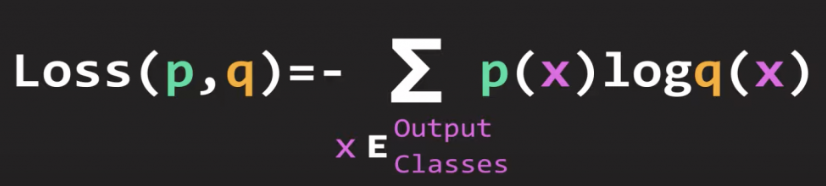

### 當XGboost要新建一棵樹時，會拿新的樹與前一棵樹以loss function做比較，去找出loss降低最多的結構，再依序下去

## 安裝 XGBoost 套件

In [2]:
#
!pip install xgboost

mysql-connector-python 8.0.19 has requirement protobuf==3.6.1, but you'll have protobuf 3.14.0 which is incompatible.
jupyter-console 5.2.0 has requirement prompt_toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 實作 XGBoost套件 XGBClassifier,以貸款預測做範例
### Parameters:
#### n_estimators: 總共迭代的次數，即決策樹的個數。預設值為100。
#### max_depth: 樹的最大深度，默認值為6。
#### booster: gbtree 樹模型(預設) / gbliner 線性模型
#### learning_rate: 學習速率，預設0.3。(訓練模型時，以學習率控制模型的學習進度)
#### gamma: 懲罰項係數，指定節點分裂所需的最小損失函數下降值。
### Attributes:
#### feature_importances_: 查詢模型特徵的重要程度。
### Methods:
#### fit: 放入X、y進行模型擬合。
#### predict: 預測並回傳預測類別。
#### score: 預測成功的比例。
#### predict_proba: 預測每個類別的機率值。

### 以下為程式碼使用範例說明
from xgboost import XGBClassifier

#### 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
#### 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
#### 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)

## STEP0: 前置作業:收集數據及準備數據集，收集完的數據，我們要進行整理
### 原始資料集
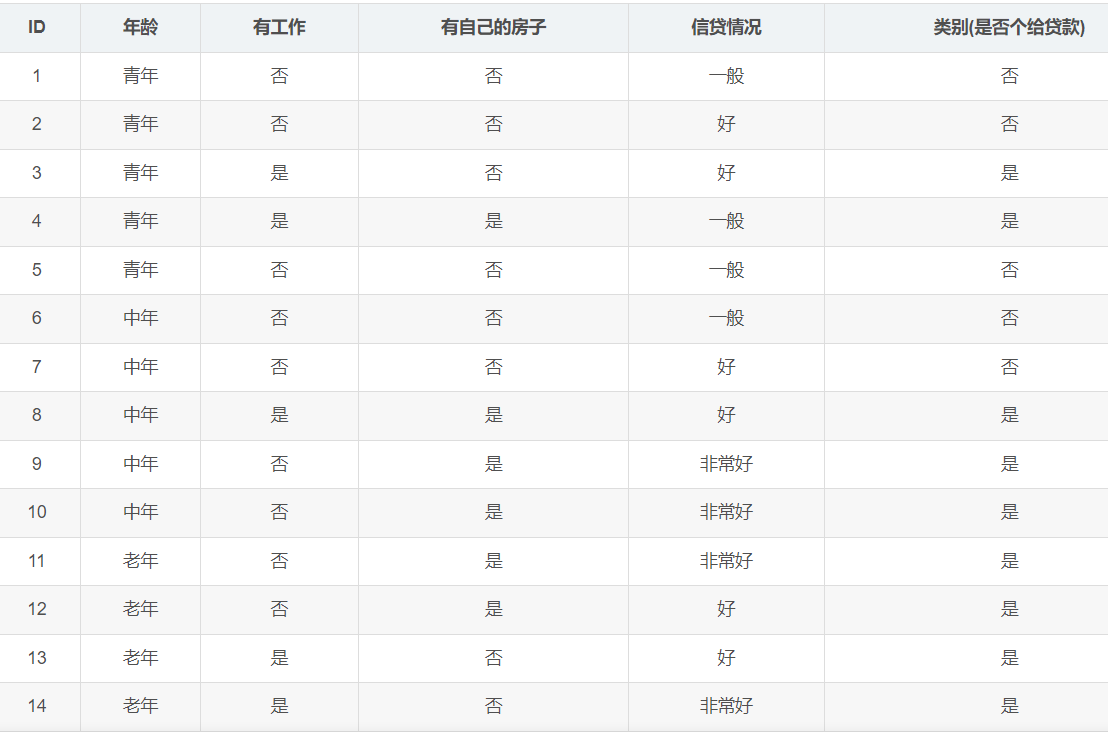

### 準備數據:準備特徵資料及整理資料
### 為方便後續程式處理,先對數據集的資料內容進行數值化標註轉換。
#### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
#### 類別(是否給貸款)：no :0 代表否，yes:1  代表是。


### STEP1 標註資料及建立資料集
#### 直接使用Python的numpy array建構資料集。
#### 建立一個是否貸款類別及對應的特徵資料集

In [3]:
import numpy as np
from xgboost import XGBClassifier

In [4]:
##### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
loan_data_X =np.array( [[0, 0, 0, 0],						#数据集
			[0, 0, 0, 1],
			[0, 1, 0, 1],
			[0, 1, 1, 0],
			[0, 0, 0, 0],
			[1, 0, 0, 0],
			[1, 0, 0, 1],
			[1, 1, 1, 1],
			[1, 0, 1, 2],
			[1, 0, 1, 2],
			[2, 0, 1, 2],
			[2, 0, 1, 1],
			[2, 1, 0, 1],
			[2, 1, 0, 2],
			[2, 0, 0, 0]])
#
#### 是否放貸款: 0:不放貸,1:放貸
loan_type_y =np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0])
print(loan_data_X.shape,loan_type_y.shape)

(15, 4) (15,)


### STEP2 切割訓練集與測試集

In [26]:
# 使用Scikit-Learn 的 train_test_split() 這個函式來做資料分割
from sklearn.model_selection import train_test_split
#train_test_split(『原始的資料』、『random_state』、『比例』)
#參數
#原始的資料：是我們打算切成 Training data 以及 Test data 的原始資料
#random_state： 亂數種子，可以固定我們切割資料的結果
#比例：可以設定 train_size 或 test_size，只要設定一邊即可，範圍在 [0-1] 之間
X_train, X_test, y_train, y_test = train_test_split(loan_data_X, loan_type_y, test_size=0.2)
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (12, 4)
test shape: (3, 4)


### STEP3 建構XGboost 模型

In [27]:
from  xgboost import XGBClassifier
# 建立 XGBClassifier 模型
dt = XGBClassifier(n_estimators=5, learning_rate= 0.3)

### STEP4 訓練模型

In [28]:
dt.fit(X_train, y_train)

[14:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\takming\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=5, n_jobs=4,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)

### STEP5 使用Score,F1-Score評估模型

In [29]:
#使用Score評估模型
# 預測成功的比例
print('訓練集: ',dt.score(X_train,y_train))
print('測試集: ',dt.score(X_test,y_test))

訓練集:  1.0
測試集:  1.0


C:\Users\takming\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\takming\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [30]:
#使用F1-Score評估模型
from sklearn.metrics import f1_score
# 預測成功的比例
dt_pred_train = dt.predict(X_train)
print('訓練集 Evaluation F1-Score=>',f1_score(y_train,dt_pred_train))
dt_pred_test = dt.predict(X_test)
print('測試集 Evaluation F1-Score=>',f1_score(y_test,dt_pred_test))

訓練集 Evaluation F1-Score=> 1.0
測試集 Evaluation F1-Score=> 0.0


C:\Users\takming\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\takming\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### STEP6 進行預測

In [34]:
# 使用predict預測分類
##### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
new_x =np.array([[0,1,0,2]])
predicted =dt.predict(new_x)
print(predicted)
if(predicted[0]==1):
    print("放貸")
elif(predicted[0]==0):
    print("不放貸")

[1]
放貸


C:\Users\takming\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
